In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mergeddata/data_merged.csv
/kaggle/input/subset-of-the-million-song-dataset/MillionSongSubset.csv
/kaggle/input/subset-of-the-million-song-dataset/billboard_rank.csv


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [5]:
data = pd.read_csv('../input/subset-of-the-million-song-dataset/billboard_rank.csv')
data.head()

,Unnamed: 0,X,KeySignatureConfidence,Tempo,TimeSignature,TimeSignatureConfidence,Title,Year,ArtistFamiliarity,Hotness,end_of_fade_in,key,Loudness,mode,mode_confidence,rank,hit
0,1,1,0.345,146.913,1,0.000,paint it black,1966,0.543393,0.338575026457,0.346,7,-11.027,0.0,0.590,21,1
1,2,2,0.354,71.999,3,0.639,dreams,1994,0.213312,0.382524686515,1.048,4,-10.773,0.0,0.393,75,0
2,3,3,0.148,122.616,1,0.000,do your thing,1969,0.447651,0.334983998108,0.200,7,-10.308,1.0,0.355,47,1
3,4,4,0.803,110.209,3,1.000,revolution,1968,0.431885,0.0,0.118,2,-5.882,0.0,0.641,78,0
4,5,5,0.420,123.049,3,0.486,carry on wayward son,1977,0.595094,0.413924379264,0.148,7,-16.406,1.0,0.563,58,0


In [6]:
data.columns

Index(['Unnamed: 0', 'X', 'KeySignatureConfidence', 'Tempo', 'TimeSignature',
       'TimeSignatureConfidence', 'Title', 'Year', 'ArtistFamiliarity',
       'Hotness', 'end_of_fade_in', 'key', 'Loudness', 'mode',
       'mode_confidence', 'rank', 'hit'],
      dtype='object')

In [7]:
data.hit.value_counts()  


1    2361
0    2201
Name: hit, dtype: int64

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4562 entries, 0 to 4561
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               4562 non-null   int64  
 1   X                        4562 non-null   int64  
 2   KeySignatureConfidence   4562 non-null   float64
 3   Tempo                    4562 non-null   object 
 4   TimeSignature            4562 non-null   int64  
 5   TimeSignatureConfidence  4562 non-null   float64
 6   Title                    4562 non-null   object 
 7   Year                     4562 non-null   int64  
 8   ArtistFamiliarity        4562 non-null   float64
 9   Hotness                  4562 non-null   object 
 10  end_of_fade_in           4562 non-null   float64
 11  key                      4562 non-null   object 
 12  Loudness                 4562 non-null   float64
 13  mode                     4562 non-null   float64
 14  mode_confidence         

In [10]:

data = data.drop(labels="Title", axis=1)
data = data.drop(labels=1474, axis=0)
data = data.drop(labels=1476, axis=0)

data['key'] = pd.to_numeric(data['key'])
data['Tempo'] = pd.to_numeric(data['Tempo'])
data['Hotness'] = pd.to_numeric(data['Hotness'])

In [11]:

X  = data.drop(['hit'], axis=1)
y = data['hit']


In [12]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4560 entries, 0 to 4561
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               4560 non-null   int64  
 1   X                        4560 non-null   int64  
 2   KeySignatureConfidence   4560 non-null   float64
 3   Tempo                    4560 non-null   float64
 4   TimeSignature            4560 non-null   int64  
 5   TimeSignatureConfidence  4560 non-null   float64
 6   Year                     4560 non-null   int64  
 7   ArtistFamiliarity        4560 non-null   float64
 8   Hotness                  4560 non-null   float64
 9   end_of_fade_in           4560 non-null   float64
 10  key                      4560 non-null   int64  
 11  Loudness                 4560 non-null   float64
 12  mode                     4560 non-null   float64
 13  mode_confidence          4560 non-null   float64
 14  rank                    

In [13]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **KNN**

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)



KNeighborsClassifier()

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[590,  86],
       [ 58, 634]])

In [21]:
print(confusion_matrix(y_test,y_pred))
print("Classification report\n")
print(classification_report(y_test, y_pred))

[[590  86]
 [ 58 634]]
Classification report



NameError: name 'classification_report' is not defined

In [22]:
acc1 = accuracy_score(y_test,y_pred)

In [23]:
acc1

0.8947368421052632

NameError: name 'tree_clf' is not defined

# **LOGISTIC REGRESSION**

In [25]:
from sklearn.linear_model import LogisticRegression
classifier1=LogisticRegression(random_state=0)
classifier1.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [26]:
y_pred=classifier1.predict(X_test)

In [30]:
acc2=accuracy_score(y_test,y_pred)


In [31]:
acc2

0.9956140350877193

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
clf_reg = LogisticRegression();
clf_reg.fit(X_train, y_train);


In [41]:
y_score2 = clf_reg.predict_proba(X_test)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))




roc_auc_score for Logistic Regression:  0.9999080788042549


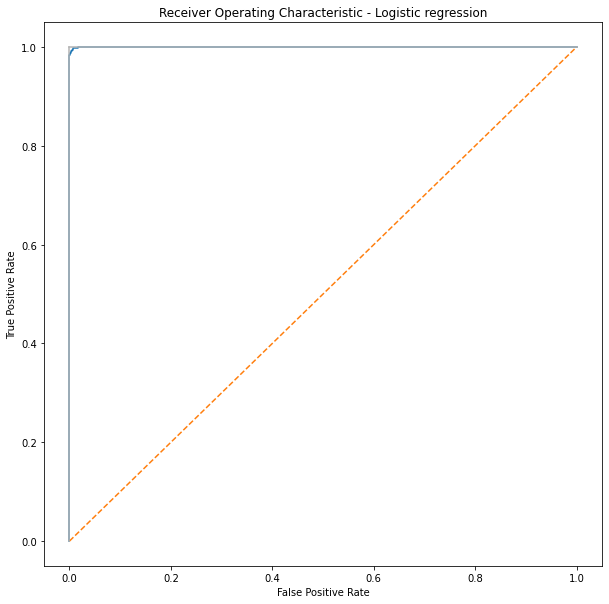

In [43]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **DECISION TREE**

In [276]:
criterion = ['gini', 'entropy']
max_depth = [8,10,12]
min_samples_split = [8,10,12]
min_samples_leaf=[1,2,3,4]

In [277]:
parameters = dict(max_depth=max_depth,
                 min_samples_split=min_samples_split,
                 min_samples_leaf=min_samples_leaf)

In [278]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
tree_clf_gs = RandomizedSearchCV(tree_clf, parameters)
tree_clf_gs.fit(X_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [8, 10, 12],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [8, 10, 12]})

In [297]:
tree_clf = DecisionTreeClassifier(max_depth=10, max_features='auto', criterion='gini', min_samples_leaf=1,
                               min_samples_split=12)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_split=12)

In [303]:
y_pred = tree_clf.predict(X_test)
acc3=accuracy_score(y_test, y_pred)
acc3

0.8823099415204678

In [304]:
y_pred_train = tree_clf.predict(X_train)
accuracy_score(y_pred_train, y_train)


0.9370300751879699

In [305]:
print(confusion_matrix(y_test, y_pred))
print("Classification report\n")
print(classification_report(y_test, y_pred))

[[609  67]
 [ 94 598]]
Classification report

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       676
           1       0.90      0.86      0.88       692

    accuracy                           0.88      1368
   macro avg       0.88      0.88      0.88      1368
weighted avg       0.88      0.88      0.88      1368



In [306]:
from sklearn.metrics import roc_curve, roc_auc_score
# predict probabilities
lr_probs = tree_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
lr_auc

0.9613471371891781

In [2]:
from matplotlib import pyplot
from numpy import sqrt, argmax, save
import numpy as np
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)
np.save("fpr_DT", fpr)
np.save("tpr_DT", tpr)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

NameError: name 'roc_curve' is not defined

SVM: f1=0.881 auc=0.966
0.5058479532163743


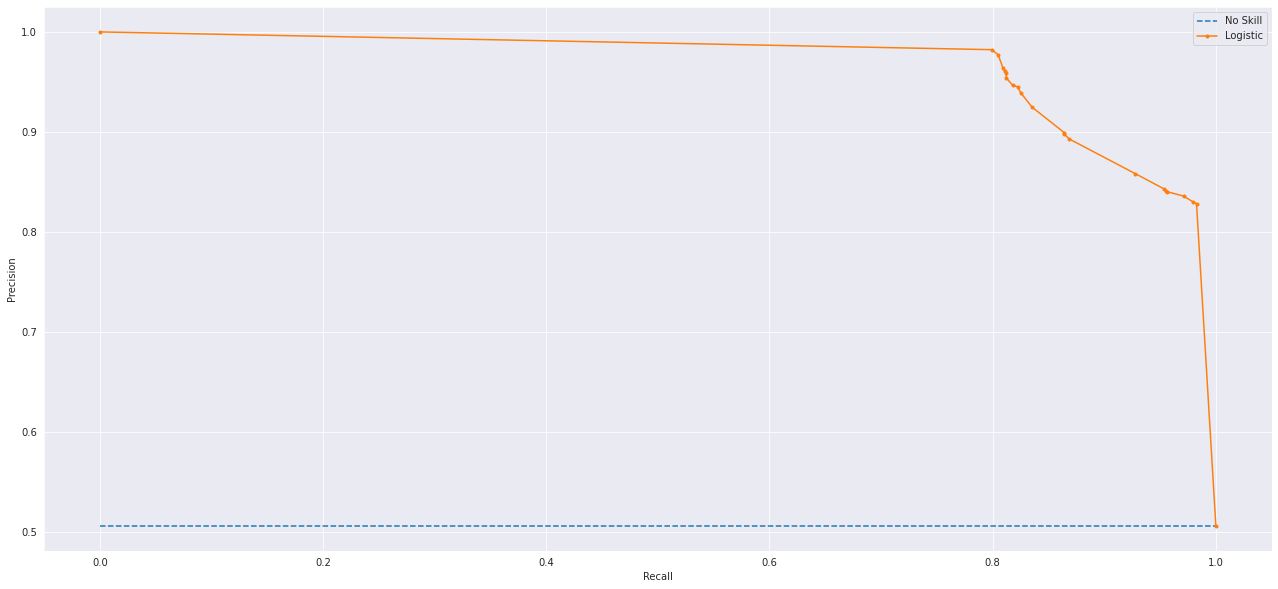

In [308]:
from sklearn.metrics import auc, precision_recall_curve, f1_score
from matplotlib import pyplot
lr_precision, lr_recall, thresholds = precision_recall_curve(y_test, lr_probs)
np.save("lrp_DT", lr_precision)
np.save("lrr_DT", lr_recall)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('SVM: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
fscore = (2 * lr_precision * lr_recall) / (lr_precision + lr_recall)
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
print(no_skill)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

# **SVM**

In [317]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [318]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
acc4=accuracy_score(y_test, y_pred)
acc4

0.993421052631579

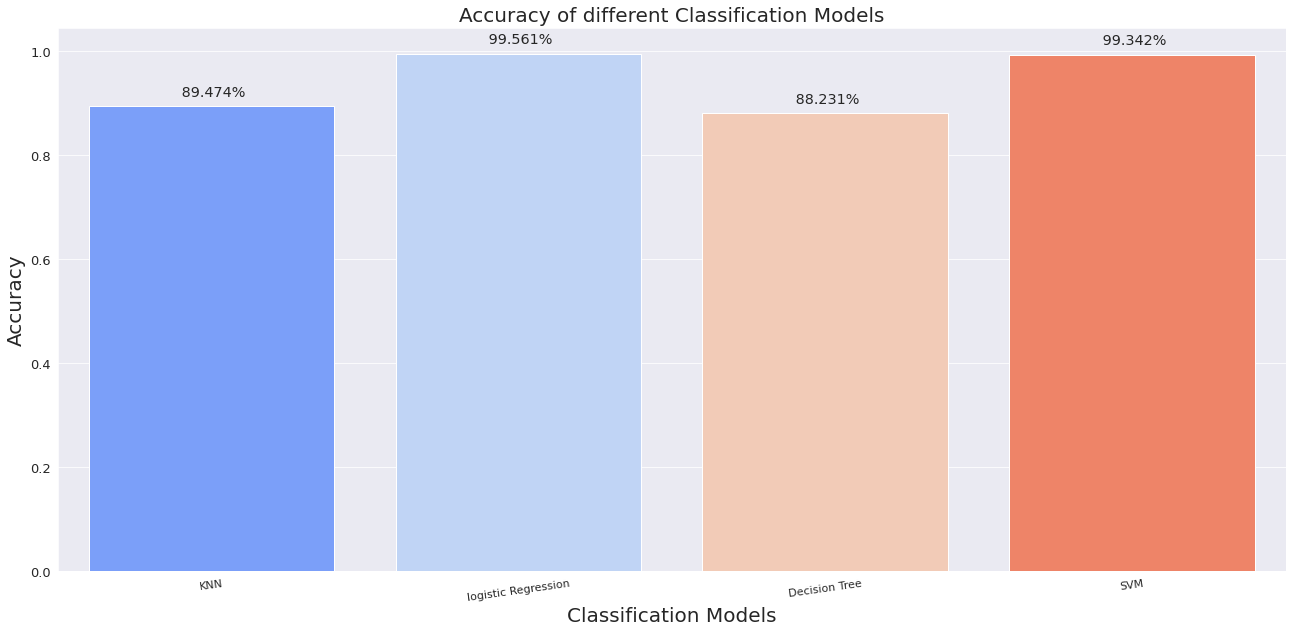

In [319]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("KNN")
mylist.append (acc2)
mylist2.append( "logistic Regression")
mylist.append(acc3)
mylist2.append("Decision Tree")
mylist.append(acc4)
mylist2.append( "SVM")

plt. rcParams ['figure.figsize']=22, 10
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "coolwarm", saturation =1.5)
plt.xlabel( "Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height ()
    x, y = p.get_xy ()
    ax.annotate (f' {height:.3%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()